# Versuch 1: Statistik I: Würfel-Simulation

In [69]:
#Name: Finn Jannik Wagner
#Matrikelnummer: 8102237
#E-Mail-Adresse: finn.jannik.wagner@physik.uni-giessen.de
#Studiengang: Physik
#Wiederholen Sie das Praktikum (Ja/Nein)? Nein

Die folgenden Aufgaben basieren auf der Generierung von (Pseudo-)Zufallszahlen am Computer. Daher liefert ein mehrfaches Ausführen der Versuche unterschiedliche Werte. Führen Sie den Code jeder einzelnen Aufgabe daher mindestens dreimal aus und dokumentieren Sie die Ergebnisse. Nutzen Sie dann (wie auch bei Experimenten im Labor) den Mittelwert und die Standardabweichung, wenn Sie die Fragen in Ihrem Protokoll beantworten.

##### Aufgabenstellung: 
Für die folgenden Aufgaben werden die Ergebnisse von Würfelwürfen untersucht. <br><br>
a) Berechnen Sie zunächst (auf Papier) den Erwartungswert, sowie die Standardabweichung eines 6-seitigen Würfels, für die Augensumme von i) zwei iii) fünf und iv) zehn Würfeln.  <br><br>
b) Berechnen Sie zunächst den Erwartungswert, sowie die Standardabweichung eines 20-seitigen Würfels, für i) die Augenzahl eines Würfels, sowie für die Augensumme von ii) zwei iii) fünf und iv) zehn Würfeln.  <br><br>
c) Simulieren Sie mit Hilfe der Funktion dice(n, m = 1, k = 20, save = "example") ein Zufallsexperiment. Dabei soll ein 20-seitiger Würfel i) $n = 100$ mal, ii) $n = 1000$ und iii) $n = 10000$ mal geworfen werden. Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil b). Anmerkung: "example" ist ein Platzhalter für den Namen der PDF-Datei, welche abgespeichert wird. Verwenden Sie unterschiedliche Namen, sonst wird die Datei überschrieben.<br><br>
d) Simulieren Sie mit Hilfe der Funktion dice(n=1000, m, k=20, save = "example") ein Zufallsexperiment. Dabei sollen i) zwei, ii) fünf und iii) zehn 20-seitige Würfel je 1000 mal geworfen werden. Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil a). <br><br>
e) Interpretieren Sie Ihre Ergebnisse. Entsprechen Sie Ihren Erwartungen?  <br><br>
f) Führen Sie mit den Werten aus d) mit Hilfe der Funktion chi_search(x = points, sigma, mu, save = "example") einen Fit durch. Dabei wird eine Gaußfunktion als theoretische Funktion verwendet. Vergleichen sie die $\chi ^2$ Werte. Welcher Wert ist besonders hoch/gering und woran könnte das liegen? <br><br>
g) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels i) mindestens einmal die 20 fällt? ii) höchstens 2 mal die 1 fällt? iii) genau 3 mal die 5 fällt? iv) genau 3 mal die 5 UND höchstens 2 mal die 1 (Tipp: Baumdiagramm kann helfen)


##### Bemerkung: 
Sie können gerne auch mit anderen Werten herumspielen, um ein besseres Gefühl für die Zusammenhänge zu bekommen. Verwenden Sie in diesem Fall die entsprechende Funktion ohne das save-Argument, also dice(n, m, k) anstatt dice(n, m, k, save). Für die Auswertung sind der Werte aus der Aufgabenstellung relevant.

In [70]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import math

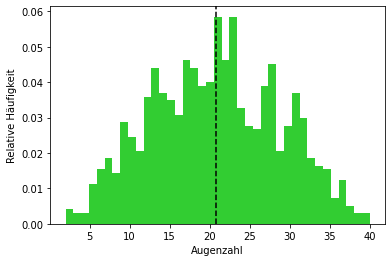

Arithmetisches Mittel:  20.733 
Empirische Standardabweichung:  8.184235517139033
without plot
(array([0.004, 0.003, 0.003, 0.011, 0.015, 0.018, 0.014, 0.028, 0.024,
       0.02 , 0.035, 0.043, 0.036, 0.034, 0.03 , 0.045, 0.043, 0.038,
       0.039, 0.057, 0.045, 0.057, 0.032, 0.027, 0.026, 0.038, 0.044,
       0.02 , 0.027, 0.036, 0.029, 0.018, 0.016, 0.015, 0.007, 0.012,
       0.005, 0.003, 0.003]), array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41]), <BarContainer object of 39 artists>)
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


0.07746979828438033

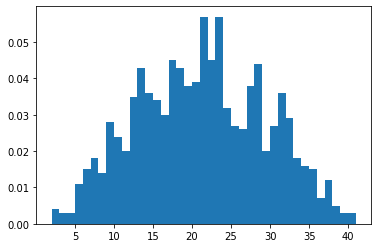

In [89]:
def dice (n, m, k, save = False):                                       
    
    """
    dice(n, m, k, save) 
    n = Anzahl der Würfelwürfe (Integer), 
    m = Anzahl der Würfel (Integer), 
    k = Anzahl der Würfelseiten (Integer) 
    save = Name des PDFs (String)
    
    Funktion plottet Histogramm eines simulierten Würfelexperiments, inklusive Markierung für den Mittelwert
    und gibt den Array, den Mittelwert und die Standardabweichung der 
    Augensummen aus. Zumdem wird ein PDF erstellt, falls save übergeben wird
    """
    m1 = m
    k1 = k
    dice_matrix=np.array([])                                            #leeres Array zum Auffüllen
    for i in range (n):
        dice_row=np.array([])
        for j in range (m):
            dice_row=np.append(dice_row,[rnd.randint(1,k+1)])           #m-er Reihe wird erzeugt. Gefüllt durch Randoms
        dice_matrix= np.append(dice_matrix,[dice_row])                  #n-te m-er Reihe wird dem Array hinzugefügt
    dice_sum = sum(dice_matrix.reshape(n,m).transpose())                #Summe der Augenzahlen
    plt.hist(dice_sum, bins = (k-1)*m+1, 
             range = (m, m*k), color = 'limegreen' , density = True)    #Histogram mit relativen Häufigkeit
    plt.axvline(np.mean(dice_sum),color='black' ,linestyle='--')        #vertikale Linie des Mittelwertes
    plt.xlabel("Augenzahl")                                             #Bezeichnung x-Achse
    plt.ylabel("Relative Häufigkeit")                                   #Bezeichnung y-Achse
    if (save != False):                                                 #wenn save ein String s ist, wird ein PDF mit dem Namen s gespeichert
        plt.title(save)
        plt.savefig(save+'.pdf')
    plt.show()                                                          #Plot
    print ("Arithmetisches Mittel: ", np.mean(dice_sum), "\nEmpirische Standardabweichung: ", np.std(dice_sum) )              
    return (dice_sum, np.mean(dice_sum), np.std(dice_sum), k1, m1 )             #Array, Mittelwert und Standardabweichung der Augensummen


def gauss(sigma, mu, x): # Setzt in die Gaussfunktion ein.
    a = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5* (x - mu)**2 /sigma**2)
    return a   

def chi_squared(y, sigma, mu, save = False):
    x = y[0]
    k = y[3]
    m = y[4]
    A = plt.hist(x, bins = np.arange(m,m*k+2), density = True)
    a= sum((((gauss(sigma, mu, A[1][:-1]) - A[0]) **2) /gauss(sigma, mu, A[1][:-1])))
    plt.plot(np.linspace(0, m*k+2, 1000), gauss(sigma, mu, np.linspace(0, m*k+2, 1000)), 'r')
    plt.xlabel("Augenzahl")
    plt.ylabel("Relative Häufigkeit")
    if (save != False):
        plt.title(save)
        plt.savefig(save+'.pdf')
    plt.show()
    print("chi-Quadrat:", a )
    pass

def chi_squared_without_plot(y, sigma, mu, save = False):
    x = y[0]
    k = y[3]
    m = y[4]
    A = plt.hist(x, bins = np.arange(m,m*k+2), density = True)
    print(A)
    print(A[1][:-1])
    a = sum( ( (( gauss(sigma, mu, A[1][:-1]) - A[0] ) **2) / gauss(sigma, mu, A[1][:-1])) )
    return a

v = dice(n=1000, m=2, k=20)
print('without plot')
chi_squared_without_plot(v, v[2], v[1])

# Aufgabe 1a)
Erwartungswerte von 6-seitigen Würfeln
## 1 Würfel:
Alle 6 Werte des Würfels sind gleich wahrscheinlich mit der Wahrscheinlichkeit 1/6. <br>
Der Erwartungswert $µ$ ist damit $1*1/6 + 2 * 1/6 + 3*1/6 + 4*1/6 + 5*1/6 + 6*1/6 = µ = 3.5$ <br>
Die Standardabweichung ist $math.sqrt(1/6*(3.5 - 1)**2 + 1/6*(3.5 - 2)**2 + 1/6*(3.5 - 3)**2 + 1/6*(3.5 - 4)**2 + 1/6*(3.5 - 5)**2 + 1/6*(3.5 - 6)**2) = math.sqrt(17.5/6) ≈ 1.71$
    
## 2 Würfel:
Da einzelne Würfelwürfe unabhängig von einander sind und für den Erwartungswert Linearität gilt, ist der Erwartungswert für $n$ Würfel $n*3.5$ <br>
In diesem Fall also $µ = 2*3.5 = 7$
    
Die Standardabweichung ist: <br>
$math.sqrt( 1/36*(7 - 2)**2 + 2/36*(7 - 3)**2 + 3/36*(7 - 4)**2 + 4/36*(7 - 5)**2 + 5/36*(7 - 6)**2 + 6/36*(7 - 7)**2 + 5/36*(7 - 8)**2 + 4/36*(7 - 9)**2 + 3/36*(7 - 10)**2 + 2/36*(7 - 11)**2 + 1/36*(7 - 12)**2) = math.sqrt(35/6) = math.sqrt(2 * 17.5/6) ≈ 2.42$ <br>
Für die Varianz gilt bei unabhängigen Würfelwürfen ebenfalls Linearität, diese lässt sich da die Wurzelfunktion monoton ist auch auf die Standardabweichung übertragen. <br>
Die Standardabweichung für zwei Würfel ist die eines Würfels mal den Faktor $math.sqrt(2)$.
    
## 5 Würfel:
Erwartungswert µ = 5*3.5 = 17.5 <br>
Standardabweichung σ = math.sqrt(5 * 17.5/6) ≈ 3.82
    
## 10 Würfel:
Erwartungswert µ = 10*3.5 = 35 <br>
Standardabweichung σ = math.sqrt(10 * 17.5/6) ≈ 5.4

# Aufgabe 1b)

Wir nehmen an das sich bei dem Würfel um einen Ikosaeder handelt, alle Seiten also die gleiche Wahrscheinlichkeit 1/20 haben.

## 1 Würfel:
Der Erwartungswert ist damit $µ = 1*1/20 + 2*1/20 + 3*1/20 + ... = 1/20 * (1+2+3+...) = (20+1)/2 * 20 * 1/20 = 21/2 = 10.5$ <br>
Die Standardabweichung ist $σ = math.sqrt(1/20 * sum([(10.5 - i)**2 $for i in range$(1, 20+1)])) = math.sqrt(133/4) ≈ 5.77$ <br>

Äquivalent zu einem 6 seitigen Würfel lassen sich Erwartungswert und Standardabweichung für mehrere Würfe auf Grund von Monotonie einfach bestimmen.

## 2 Würfel:
Erwartungswert $µ = 2*10.5 = 21$ <br>
Standardabweichung $σ = math.sqrt(2 * 133/4) ≈ 8.15$
    
## 5 Würfel:
Erwarungswert $µ = 5*10.5 = 52.5$ <br>
Standardabweichung $σ = math.sqrt(5 * 133/4) ≈ 12.89$

## 10 Würfel:
Erwarungswert $µ = 10*10.5 = 105$ <br>
Standardabweichung $σ = math.sqrt(10 * 133/4) ≈ 18.23$

In [ ]:
#Aufgabe 1c)

"""
Simulieren Sie mit Hilfe der Funktion dice(n, m = 1, k = 20, save = "example") ein Zufallsexperiment.
Dabei soll ein 20-seitiger Würfel i) 𝑛=100 mal, ii) 𝑛=1000 und iii) 𝑛=10000 mal geworfen werden.
Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil b).
"""
print(f'Drei Versuchsdurchführungen mit {100} Würfen')
dice1_1 = dice(n=100, m=1, k=20) # Erstes Ergebnis für 100 Würfe
dice1_2 = dice(n=100, m=1, k=20) # Zweites Ergebnis für 100 Würfe
dice1_3 = dice(n=100, m=1, k=20) # Drittes Ergebnis für 100 Würfe
dice1 = [dice1_1, dice1_2, dice1_3]

dice2_1 = dice(n=1000, m=1, k=20) # Erstes Ergebnis für 1000 Würfe
dice2_2 = dice(n=1000, m=1, k=20) # Zweites Ergebnis für 1000 Würfe
dice2_3 = dice(n=1000, m=1, k=20) # Drittes Ergebnis für 1000 Würfe
dice2 = [dice2_1, dice2_2, dice2_3]

dice3_1 = dice(n=10000, m=1, k=20) # Erstes Ergebnis für 10000 Würfe
dice3_2 = dice(n=10000, m=1, k=20) # Zweites Ergebnis für 10000 Würfe
dice3_3 = dice(n=10000, m=1, k=20) # Drittes Ergebnis für 10000 Würfe
dice3 = [dice3_1, dice3_2, dice3_3]

# TODO Add Comments for prettier output with times executed


In [73]:
# Berechnen Sie den Mittelwert für Ihre Ergebnisse aus 1 c)
#Schreiben Sie hier Ihren eigenen Code angelehnt an das vorherige Beispiel

#Auswertung Mittelwert für 100 Würfe
dices = dice1
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 10.5
abweichung = abs(theoretischer_erwartungswert-µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['mäßig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 0]  # TODO Approximation anpassen.

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {100} Würfen '
      f'eines 20 seitigen Würfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}.')
# TODO Genauigkeit anpassen

Die drei experimentellen Werte für das arithmetische Mittel bei 100 Würfen eines 20 seitigen Würfels sind: 10.78, 10.9, 10.25
Der Mittelwert der experimentelen Ergebnisse µ=10.6433 ist eine mäßig gute Aproximation des berechneten Werts von 10.5. Der experimentele Wert ist auf keine Nachkommastellen genau mit einer Abweichung von 0.1433.


In [74]:
#Auswertung Mittelwert für 1000 Würfe
dices = dice2
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 10.5
abweichung = abs(theoretischer_erwartungswert-µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['mäßig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {1000} Würfen '
      f'eines 20 seitigen Würfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}.')

Die drei experimentellen Werte für das arithmetische Mittel bei 1000 Würfen eines 20 seitigen Würfels sind: 10.758, 10.155, 10.801
Der Mittelwert der experimentelen Ergebnisse µ=10.5713 ist eine gute Aproximation des berechneten Werts von 10.5. Der experimentele Wert ist auf 1 Nachkommastellen genau mit einer Abweichung von 0.0713.


In [75]:
#Auswertung Mittelwert für 10000 Würfe
dices = dice3
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 10.5
abweichung = abs(theoretischer_erwartungswert-µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['mäßig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {10000} Würfen '
      f'eines 20 seitigen Würfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}.')

# TODO Vergleiche Mittelwerte welcher ist am nächsten dran, welcher fällt aus der Reihe. Generell mit mehr Würfen steigt Genauigkeit.
# TODO Dafür Wert speichern in jeder Zelle und dann Abweichung berechnen etc.

Die drei experimentellen Werte für das arithmetische Mittel bei 10000 Würfen eines 20 seitigen Würfels sind: 10.4975, 10.4887, 10.4978
Der Mittelwert der experimentelen Ergebnisse µ=10.4947 ist eine gute Aproximation des berechneten Werts von 10.5. Der experimentele Wert ist auf 1 Nachkommastellen genau mit einer Abweichung von 0.0053.


In [76]:
# Berechnen Sie die Standardabweichung für Ihre Ergebnisse aus 1 c)
#Schreiben Sie hier Ihren eigenen Code angelehnt an das vorherige Beispiel

#Auswertung Standardabweichung für 100 Würfe
dices = dice1
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
σ = np.sqrt((dices[0][1]-µ)**2+(dices[1][1]-µ)**2+(dices[2][1]-µ)**2)
theoretische_standardabweichung = 5.77
abweichung = abs(theoretische_standardabweichung-σ)

print(f'Die Standardabweichung für {100} Würfe eines 20 seitigen Würfels beträgt bei den berechneten experimentellen '
      f'Ergebnissen {σ=:.4f} mit dem experimentell berechneten Erwartungswert.')
print(f'Die Standardabweichung der experimentelen Ergebnisse betägt {σ=:.4f}'
      f' sie hat eine Abweichung von {abweichung:.4f} vom theoretischen Wert {theoretische_standardabweichung}.')

Die Standardabweichung für 100 Würfe eines 20 seitigen Würfels beträgt bei den berechneten experimentellen Ergebnissen σ=0.4891 mit dem experimentell berechneten Erwartungswert.
Die Standardabweichung der experimentelen Ergebnisse betägt σ=0.4891 sie hat eine Abweichung von 5.2809 vom theoretischen Wert 5.77.


In [77]:
#Auswertung Standardabweichung für 1000 Würfe
dices = dice2
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
σ = np.sqrt((dices[0][1]-µ)**2+(dices[1][1]-µ)**2+(dices[2][1]-µ)**2)
theoretische_standardabweichung = 5.77
abweichung = abs(theoretische_standardabweichung-σ)

print(f'Die Standardabweichung für {1000} Würfe eines 20 seitigen Würfels beträgt bei den berechneten experimentellen '
      f'Ergebnissen {σ=:.4f} mit dem experimentell berechneten Erwartungswert.')
print(f'Die Standardabweichung der experimentelen Ergebnisse betägt {σ=:.4f}'
      f' sie hat eine Abweichung von {abweichung:.4f} vom theoretischen Wert {theoretische_standardabweichung}.')

Die Standardabweichung für 1000 Würfe eines 20 seitigen Würfels beträgt bei den berechneten experimentellen Ergebnissen σ=0.5108 mit dem experimentell berechneten Erwartungswert.
Die Standardabweichung der experimentelen Ergebnisse betägt σ=0.5108 sie hat eine Abweichung von 5.2592 vom theoretischen Wert 5.77.


In [78]:
#Auswertung Standardabweichung für 10000 Würfe
dices = dice3
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
σ = np.sqrt((dices[0][1]-µ)**2+(dices[1][1]-µ)**2+(dices[2][1]-µ)**2) # <----- Die Formel falsch???
theoretische_standardabweichung = 5.77
abweichung = abs(theoretische_standardabweichung-σ)

print(f'Die Standardabweichung für {10000} Würfe eines 20 seitigen Würfels beträgt bei den berechneten experimentellen '
      f'Ergebnissen {σ=:.4f} mit dem experimentell berechneten Erwartungswert.')
print(f'Die Standardabweichung der experimentelen Ergebnisse betägt {σ=:.4f}'
      f' sie hat eine Abweichung von {abweichung:.4f} vom theoretischen Wert {theoretische_standardabweichung}.')
# TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO: WARUM SO GROßE ABWEICHUNGEN???????????????????????????????????????????????????

Die Standardabweichung für 10000 Würfe eines 20 seitigen Würfels beträgt bei den berechneten experimentellen Ergebnissen σ=0.0073 mit dem experimentell berechneten Erwartungswert.
Die Standardabweichung der experimentelen Ergebnisse betägt σ=0.0073 sie hat eine Abweichung von 5.7627 vom theoretischen Wert 5.77.


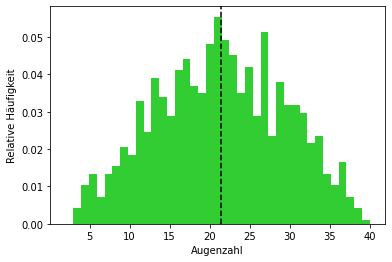

Arithmetisches Mittel:  21.352 
Empirische Standardabweichung:  8.202932158685698


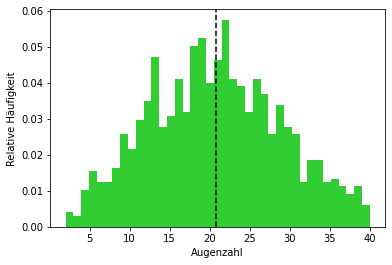

Arithmetisches Mittel:  20.736 
Empirische Standardabweichung:  8.428422390934141


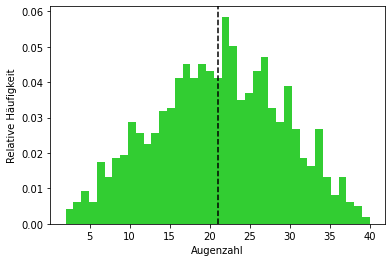

Arithmetisches Mittel:  21.082 
Empirische Standardabweichung:  8.209706206679993


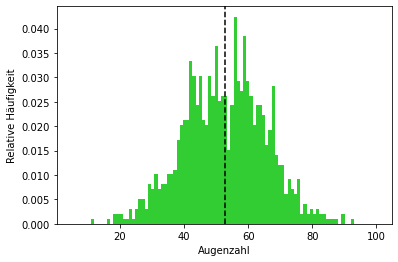

Arithmetisches Mittel:  52.808 
Empirische Standardabweichung:  12.915925673369292


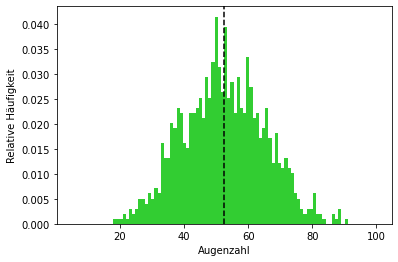

Arithmetisches Mittel:  52.486 
Empirische Standardabweichung:  12.922376097297278


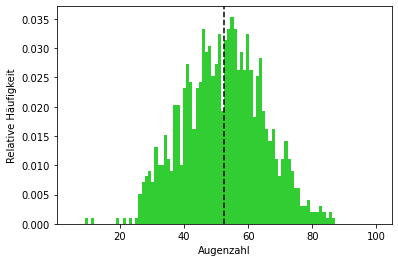

Arithmetisches Mittel:  52.328 
Empirische Standardabweichung:  12.657583339642681


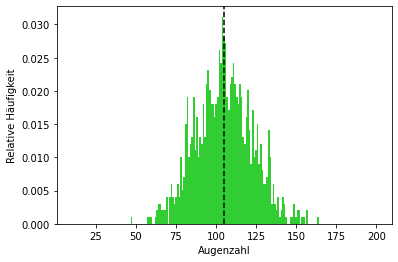

Arithmetisches Mittel:  105.033 
Empirische Standardabweichung:  17.85989672422548


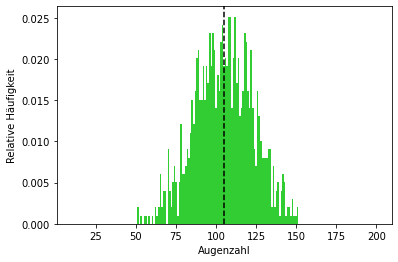

Arithmetisches Mittel:  104.908 
Empirische Standardabweichung:  18.300533762707577


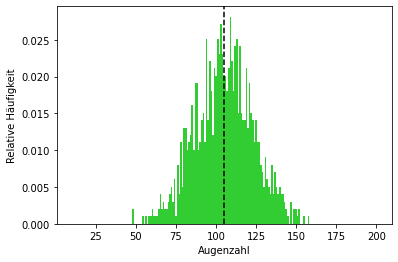

Arithmetisches Mittel:  104.941 
Empirische Standardabweichung:  18.190973558333816


In [92]:
#Aufgabe 1d)
"""
Simulieren Sie mit Hilfe der Funktion dice(n=1000, m, k=20, save = "example") ein Zufallsexperiment. 
Dabei sollen i) zwei, ii) fünf und iii) zehn 20-seitige Würfel je 1000 mal geworfen werden.
Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil a). 
"""
dice4_1 = dice(n=1000, m=2, k=20) #Erstes Ergebnis für 2 Würfel
dice4_2 = dice(n=1000, m=2, k=20) #Zweites Ergebnis für 2 Würfel
dice4_3 = dice(n=1000, m=2, k=20) #Drittes Ergebnis für 2 Würfel
dice4 = [dice4_1, dice4_2, dice4_3]

dice5_1 = dice(n=1000, m=5, k=20) #Erstes Ergebnis für 5 Würfel
dice5_2 = dice(n=1000, m=5, k=20) #Zweites Ergebnis für 5 Würfel
dice5_3 = dice(n=1000, m=5, k=20) #Drittes Ergebnis für 5 Würfel
dice5 = [dice5_1, dice5_2, dice5_3]

dice6_1 = dice(n=1000, m=10, k=20) #Erstes Ergebnis für 10 Würfel
dice6_2 = dice(n=1000, m=10, k=20) #Zweites Ergebnis für 10 Würfel
dice6_3 = dice(n=1000, m=10, k=20) #Drittes Ergebnis für 10 Würfel
dice6 = [dice6_1, dice6_2, dice6_3]

In [80]:
#Auswertung Mittelwert für 2 Würfel
dices = dice4
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 21
abweichung = abs(theoretischer_erwartungswert-µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['mäßig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {2} Würfeln '
      f'eines 20 seitigen Würfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}')

Die drei experimentellen Werte für das arithmetische Mittel bei 2 Würfeln eines 20 seitigen Würfels sind: 21.065, 21.08, 20.432
Der Mittelwert der experimentelen Ergebnisse µ=20.8590 ist eine mäßig gute Aproximation des berechneten Werts von 21. Der experimentele Wert ist auf keine Nachkommastellen genau mit einer Abweichung von 0.1410


In [81]:
#Auswertung Mittelwert für 5 Würfel
dices = dice5
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 52.5
abweichung = abs(theoretischer_erwartungswert-µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['mäßig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {5} Würfeln '
      f'eines 20 seitigen Würfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}')

Die drei experimentellen Werte für das arithmetische Mittel bei 5 Würfeln eines 20 seitigen Würfels sind: 51.535, 51.824, 52.618
Der Mittelwert der experimentelen Ergebnisse µ=51.9923 ist eine mäßig gute Aproximation des berechneten Werts von 52.5. Der experimentele Wert ist auf keine Nachkommastellen genau mit einer Abweichung von 0.5077


In [82]:
#Auswertung Mittelwert für 10 Würfel
dices = dice6
µ = (dices[0][1] + dices[1][1] + dices[2][1])/3
theoretischer_erwartungswert = 105
abweichung = abs(theoretischer_erwartungswert-µ)
nachkomma_genauigkeit = abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 'keine'
approximation = ['mäßig gute', 'gute', 'sehr gute'][abs(int(math.log10(abs(µ)))) if 1-abweichung > 0.9 else 0]

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {10} Würfeln '
      f'eines 20 seitigen Würfels sind: {", ".join([str(i[1]) for i in dices])}')
print(f'Der Mittelwert der experimentelen Ergebnisse {µ=:.4f} ist eine {approximation} Aproximation des berechneten Werts von {theoretischer_erwartungswert}. '
      f'Der experimentele Wert ist auf {nachkomma_genauigkeit} Nachkommastellen genau mit einer Abweichung von {abweichung:.4f}')

Die drei experimentellen Werte für das arithmetische Mittel bei 10 Würfeln eines 20 seitigen Würfels sind: 105.252, 104.721, 103.938
Der Mittelwert der experimentelen Ergebnisse µ=104.6370 ist eine mäßig gute Aproximation des berechneten Werts von 105. Der experimentele Wert ist auf keine Nachkommastellen genau mit einer Abweichung von 0.3630


In [83]:
#Auswertung Standardabweichung für 2 Würfel
# Standardabweichung σ = math.sqrt(2 * 133/4)

In [84]:
#Auswertung Standardabweichung für 5 Würfel 
σ = math.sqrt(5*133/4)

In [85]:
#Auswertung Standardabweichung für 10 Würfel 
σ = math.sqrt(10*133/4)

In [86]:
#Aufgabe 1e) 

"""
Interpretieren Sie Ihre Ergebnisse. Entsprechen Sie Ihren Erwartungen? 

Ja, die Werte entsprachen unseren Erwartungen. Die theoretisch berechneten Werte unterscheiden sich bei den hier durch gerecheneten Beispielversuchen erst
in der ersten Nachkommastelle. Folglich sind wohl Theorie und experimentelle Umsetzung korrekt durchgeführt worden, da sich die Ergebnise, bis auf ebenjene Abweichungen, gleichen.

Die Ergebnisse der durchgeführten Versuche wurden wiedererwartens nicht konstant mit steigender Durchführungszahl immer genauer.
Die Abweichungen beim wiederholten Werfen des 20-seitigen Würfels waren bei manchen Durchführungen für 100 Würfe kleiner als für manche der Durchführungen mit 1000 oder sogar 10000 Würfen!
Ebenso gibt es bei den berechneten Standardabweichungen Ausreißer.
Trotzdem lässt sich aus den Experimenten der Trend ableiten, das für mehr Durchführungen des Experiments die Ergebnisse immer genauer werden. Ganz nach dem Gesetz der großen Zahlen.
Um also aus Experimenten Gesetzmäßigkeiten herzuleiten oder theoretische Berechnungen zu bestätigen,
ist es also unbedingt von Vorteil möglichst viele Experimente durchzuführen um einen möglichst genauen Mittelwert zum vergleichen zu bestimmen.
"""

'\nInterpretieren Sie Ihre Ergebnisse. Entsprechen Sie Ihren Erwartungen? \n\nJa, die Werte entsprachen meinen Erwartungen. Die theoretisch berechneten Werte unterscheiden sich bei den hier durch gerecheneten Beispielversuchen erst\nin der ersten Nachkommastelle. Folglich sind wohl Theorie und experimentelle Umsetzung korrekt durchgeführt worden, da sich die Ergebnise, bis auf ebenjene Abweichungen, gleichen.\n\nDie Ergebnisse der durchgeführten Versuche wurden wiedererwartens nicht konstant mit steigender Durchführungszahl immer genauer.\nDie Abweichungen beim wiederholten Werfen des 20-seitigen Würfels waren 0.04, 0.106 und 0.0459. Hier ist sogar das erste Ergebnis bei dem nur 100 mal geworfen wurde\nnäher am theoretischen Wert als beide Versuche mit 10 und 100 mal so vielen Würfen.\nEbenso gibt es bei den berechneten Standardabweichungen einen Ausreißer da der Wert für 3 Versuche mit 1000 größer ist, als für 100\nDie Standardabweichungen bei den wiederholten Versuchen waren auch rel

In [ ]:
#Aufgabe 1f)
"""
Führen Sie mit den Werten aus d) mit Hilfe der Funktion chi_search(x = points, sigma, mu, save = "example") einen Fit durch.
Dabei wird eine Gaußfunktion als theoretische Funktion verwendet. Vergleichen sie die 𝜒2 Werte.
Welcher Wert ist besonders hoch/gering und woran könnte das liegen? 

chi_squared(dice4[1], sigma = ?, mu = ?)
chi_squared(dice5[1], sigma = ?, mu = ?)
chi_squared(dice6[1], sigma = ?, mu = ?)

Steht im Skript erklärt. 3.1.5 in der Aufgabenstellung"""

print('Theoretisch')
chi_squared(dice4[1], sigma = math.sqrt(266/4), mu=21)

chi_squared(dice4[0], sigma =100, mu= dice4[0][1])
print('Experimentell 1 1')
chi_squared(dice4[0], sigma = dice4[0][2], mu= dice4[0][1])
print('Experimentell 1 2')
chi_squared(dice4[1], sigma = dice4[1][2], mu= dice4[1][1])
print('Experimentell 1 3')
chi_squared(dice4[2], sigma = dice4[2][2], mu= dice4[2][1])
mittelwert4 = (dice4[0][1]+dice4[1][1]+dice4[2][1])/3
standard4 = (dice4[0][2]+dice4[1][2]+dice4[2][2])/3
print('Durchschnitt experimentell')
chi_squared(dice4[1], sigma = standard4, mu=mittelwert4)

print('Experimentell 2 1')
chi_squared(dice5[0], sigma = dice5[0][2], mu= dice5[0][1])
print('Experimentell 2 2')
chi_squared(dice5[1], sigma = dice5[1][2], mu= dice5[1][1])
print('Experimentell 2 3')
chi_squared(dice5[2], sigma = dice5[2][2], mu= dice5[2][1])

print('Experimentell 3 1')
chi_squared(dice6[0], sigma = dice6[0][2], mu= dice6[0][1])
print('Experimentell 3 2')
chi_squared(dice6[1], sigma = dice6[1][2], mu= dice6[1][1])
print('Experimentell 3 3')
chi_squared(dice6[2], sigma = dice6[2][2], mu= dice6[2][1])

#counter = 0
#for i in range(1, 10):
#    print(chi_squared_without_plot(dice4[1], sigma =(math.sqrt(266/4)), mu=(21-counter)))
#    counter += 0.0001

"""
Diese sind für die Gaußfunktion, die nur von σ und µ der Datenmenge abhängt.

Der beste Fit an experimentelle Datenwerte, also das kleinste χ2 erhält man, wenn man die aus dem Datensatz errechnete Standardabweichung und Mittelwert einsetzt.
Das ist besser als der theoretische Wert oder der Durchschnitt der experimentellen Standardabweichungen und Mittelwerte.
Bei endlichen statistischen Versuchen entspricht das Ergebnis einer Messreihe nie exakt dem theoretischen Wert. Den besten Fit erhält man dann natürlich durch die
aus ihm selbst berechneten Werte.
Für mehr Würfel wird das χ2 größer, da bei gleichbleibender Anzahl an Würfen mehr Bins getroffen werden können. Die mögliche Abweichung pro Bin also größer wird.
Die experimentelle Datenmenge ist weiter von der theroetische Gaußverteilung entfernt und kann deswegen auch nicht so gut mit einer Gaußfunktion approximiert werden.
Deutlich hier weil χ2 für 2 Würfel kleiner ist als für 5 und für 5 Würfel kleiner als für 10.
Mit mehr Würfen, also mehr Durchführungen des Versuchs, würde sich das χ2 auch hier, bei mehr Würfeln, wieder kleiner werden.
"""

# Aufgabe 1g)
## i) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels mindestens einmal die 20 fällt?
Wir betrachten die Wahrscheinlichkeit das die 20 überhaupt nicht fällt.
In jedem Wurf bleiben von den 20 Möglichkeiten noch 19 übrig. <br>
q ist damit = (1 - p)**10 = (19/20)**10<br>
Die gesuchte Wahrscheinlichkeit ist dann p = 1 - q = 1 - (19/20)**10 ≈ 0.401 

## ii) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels höchstens 2 mal die 1 fällt?
Die Wahrscheinlichkeit auf eine 1 ist p = 1/20 <br>
Wir betrachten nun die Wahrscheinlichkeiten das die Eins 0 mal, 1 mal oder 2 mal gewürfelt wird. <br>
Die Wahrscheinlichkeit das bei n Würfen die Zahl, mit Wahrscheinlichkeit p, genau k-mal vorkommt ist: <br>
$p(x=k) = n!/(k! * (n-k)!) * p**k * (1-p)**(n-k)$

Die Wahrscheinlichkeit das die gar nicht 1 fällt ist $(19/20)**10 ≈ 0.599$ <br>
$p(k=0) = math.factorial(10)/(math.factorial(0) * math.factorial(10-0)) * (1/20)**0 * (1-1/20)**(10-0) ≈ 0.599$ <br>
$p(k=1) = math.factorial(10)/(math.factorial(1) * math.factorial(10-1)) * (1/20)**1 * (1-1/20)**(10-1) ≈ 0.315$ <br>
$p(k=2) = math.factorial(10)/(math.factorial(2) * math.factorial(10-2)) * (1/20)**2 * (1-1/20)**(10-2) ≈ 0.075$ <br>

Die gesuchte Wahrscheinlichkeit ist damit $P = p(k=0) + p(k=1) + p(k=2) ≈ 0.988496$

## iii) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels genau 3 mal die 5 fällt?
Die Wahrscheinlichkeit das genau 3 mal die 5 fällt lässt sich mit der Formel aus Aufgabenteil ii) berechnen <br>
$p(k=3) = math.factorial(10)/(math.factorial(3) * math.factorial(10-3)) * (1/20)**3 * (1-1/20)**(10-3) ≈ 0.0105$

## iv) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels genau 3 mal die 5 UND höchstens 2 mal die 1
Die beiden Ereignisse ii) und iii) sind stochastisch unabhängig dann <br>
p(ii) * p(iii) = <br>
    math.factorial(10)/(math.factorial(3) * math.factorial(10-3)) * (1/20)**3 * (1-1/20)**(10-3) * ( <br>
        math.factorial(10)/(math.factorial(0) * math.factorial(10-0)) * (1/20)**0 * (1-1/20)**(10-0) + <br>
        math.factorial(10)/(math.factorial(1) * math.factorial(10-1)) * (1/20)**1 * (1-1/20)**(10-1) + <br>
        math.factorial(10)/(math.factorial(2) * math.factorial(10-2)) * (1/20)**2 * (1-1/20)**(10-2)) <br>
≈ 0.01038

Die beiden Ereignisse ii) und iii) sind stochastisch abhängig: <br>
Damit das Ereignis eintritt müssen 3 Würfel eine 5 zeigen. Die übrigen 7 Würfel können nun 0, 1 oder 2 Einsen zeigen. <br>
Also p(iii) * (p(k=0) + p(k=1) + p(k=2)) <br>
math.factorial(10)/(math.factorial(3) * math.factorial(10-3)) * (1/20)**3 * (1-1/20)**(10-3) * ( <br>
    math.factorial(7)/(math.factorial(0) * math.factorial(7-0)) * (1/20)**0 * (1-1/20)**(7-0) + <br>
    math.factorial(7)/(math.factorial(1) * math.factorial(7-1)) * (1/20)**1 * (1-1/20)**(7-1) + <br>
    math.factorial(7)/(math.factorial(2) * math.factorial(7-2)) * (1/20)**2 * (1-1/20)**(7-2)) <br>
≈ 0.01043570419298467